In [ ]:
pip install pyttsx3

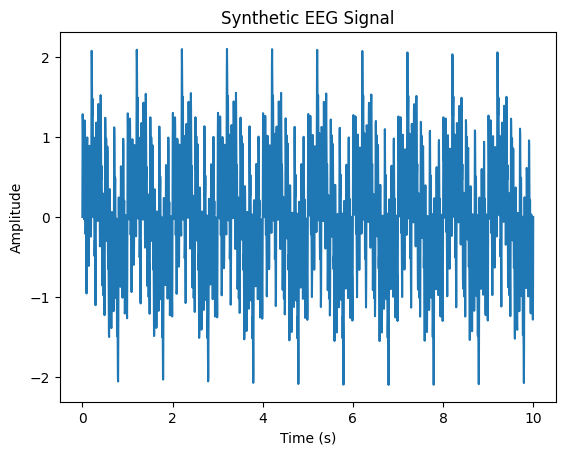

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate time vector
duration = 10  # 10 seconds
fs = 256  # Sampling rate
t = np.linspace(0, duration, duration * fs)

# Generate synthetic EEG signals
delta = 0.5 * np.sin(2 * np.pi * 1 * t)  # Delta wave
theta = 0.5 * np.sin(2 * np.pi * 6 * t)  # Theta wave
alpha = 0.5 * np.sin(2 * np.pi * 10 * t)  # Alpha wave
beta = 0.5 * np.sin(2 * np.pi * 20 * t)  # Beta wave
gamma = 0.5 * np.sin(2 * np.pi * 40 * t)  # Gamma wave

# Combine to create synthetic EEG
eeg_signal = delta + theta + alpha + beta + gamma

# Plot the synthetic EEG signal
plt.plot(t, eeg_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Synthetic EEG Signal')
plt.show()


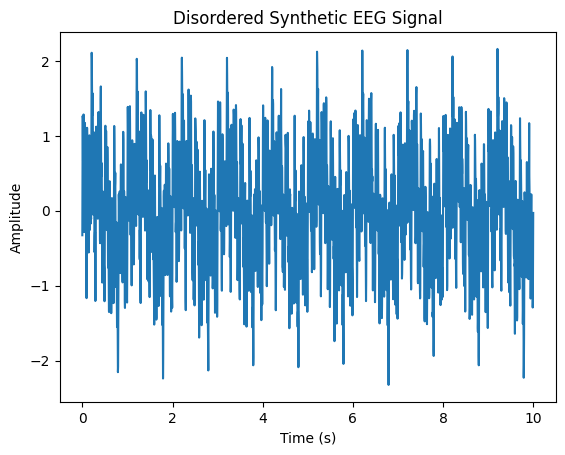

In [ ]:
# Add noise to simulate disordered EEG
noise = np.random.normal(0, 0.1, eeg_signal.shape)
disordered_eeg_signal = eeg_signal + noise

# Plot the disordered EEG signal
plt.plot(t, disordered_eeg_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Disordered Synthetic EEG Signal')
plt.show()


In [ ]:
!pip install gTTS



In [ ]:
!pip install gTTS pydub librosa matplotlib
!pip install pyttsx3 pydub


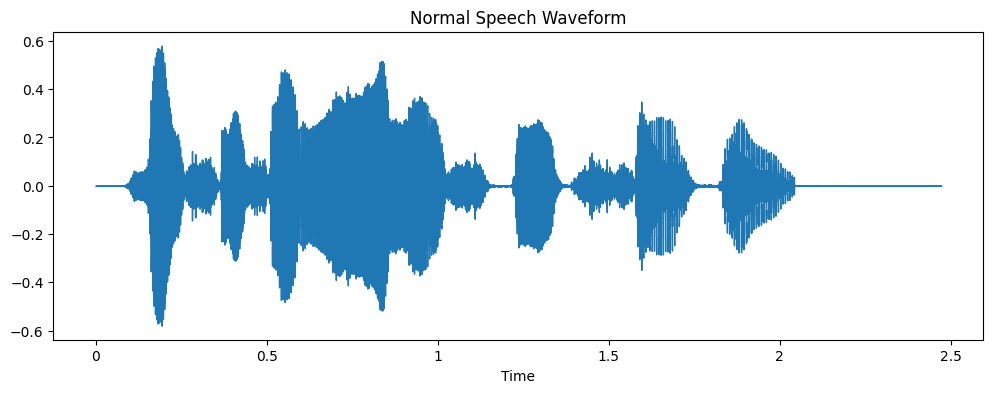

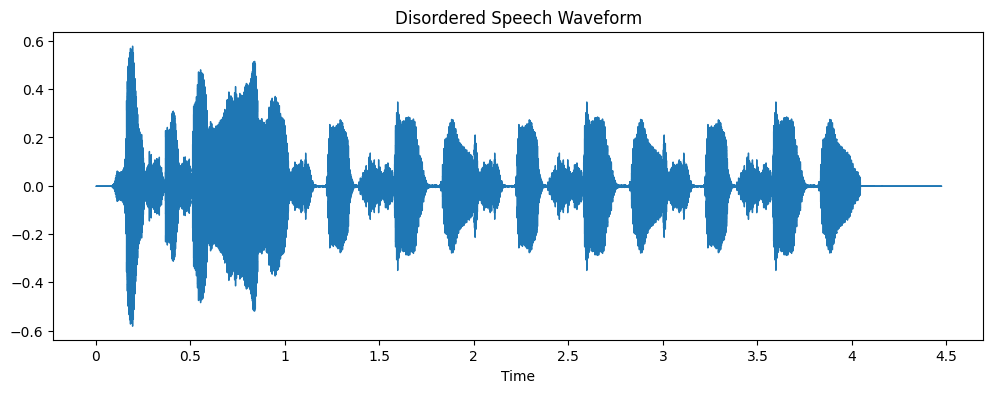

In [ ]:
from gtts import gTTS
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from pydub import AudioSegment

# Generate normal speech sample
text = "This is a normal speech sample."
tts = gTTS(text)
tts.save('normal_speech.mp3')

# Convert MP3 to WAV
sound = AudioSegment.from_mp3('normal_speech.mp3')
sound.export('normal_speech.wav', format='wav')

# Load and plot the normal speech
y, sr = librosa.load('normal_speech.wav', sr=None)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Normal Speech Waveform')
plt.show()

# Load the normal speech sample
speech = AudioSegment.from_wav('normal_speech.wav')

# Create a repetition effect
repeated_segment = speech[1000:2000] * 3  # Repeat a segment 3 times

# Concatenate to create disordered speech
disordered_speech = speech[:1000] + repeated_segment + speech[2000:]

# Save the disordered speech
disordered_speech.export('disordered_speech.wav', format='wav')

# Plot the disordered speech
y_disordered, sr_disordered = librosa.load('disordered_speech.wav', sr=None)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_disordered, sr=sr_disordered)
plt.title('Disordered Speech Waveform')
plt.show()


In [ ]:
import pandas as pd

# Example annotations
annotations = {
    "start_time": [0, 1],
    "end_time": [1, 2],
    "eeg_segment": ["eeg_1.npy", "eeg_2.npy"],
    "audio_segment": ["normal_speech.wav", "disordered_speech.wav"],
    "label": ["normal", "disordered"]
}

# Create DataFrame
df_annotations = pd.DataFrame(annotations)

# Save to CSV
df_annotations.to_csv('annotations.csv', index=False)

# Display the annotations
df_annotations.head()


,start_time,end_time,eeg_segment,audio_segment,label
0,0,1,eeg_1.npy,normal_speech.wav,normal
1,1,2,eeg_2.npy,disordered_speech.wav,disordered


In [ ]:
!pip install mne



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.0 MB/s eta 0:00:00


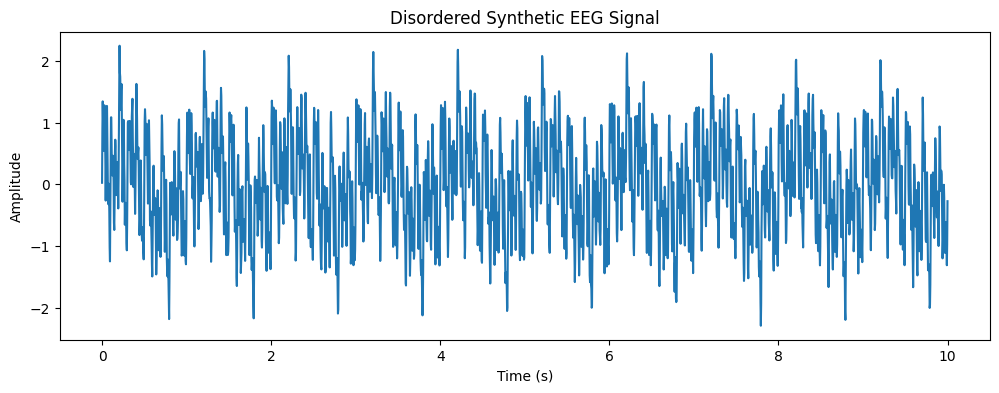

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Generate time vector
duration = 10  # 10 seconds
fs = 256  # Sampling rate
t = np.linspace(0, duration, duration * fs)

# Generate synthetic EEG signals
delta = 0.5 * np.sin(2 * np.pi * 1 * t)  # Delta wave
theta = 0.5 * np.sin(2 * np.pi * 6 * t)  # Theta wave
alpha = 0.5 * np.sin(2 * np.pi * 10 * t)  # Alpha wave
beta = 0.5 * np.sin(2 * np.pi * 20 * t)  # Beta wave
gamma = 0.5 * np.sin(2 * np.pi * 40 * t)  # Gamma wave

# Combine to create synthetic EEG
eeg_signal = delta + theta + alpha + beta + gamma

# Add noise to simulate disordered EEG
noise = np.random.normal(0, 0.1, eeg_signal.shape)
disordered_eeg_signal = eeg_signal + noise

# Plot the synthetic EEG signal
plt.figure(figsize=(12, 4))
plt.plot(t, disordered_eeg_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Disordered Synthetic EEG Signal')
plt.show()


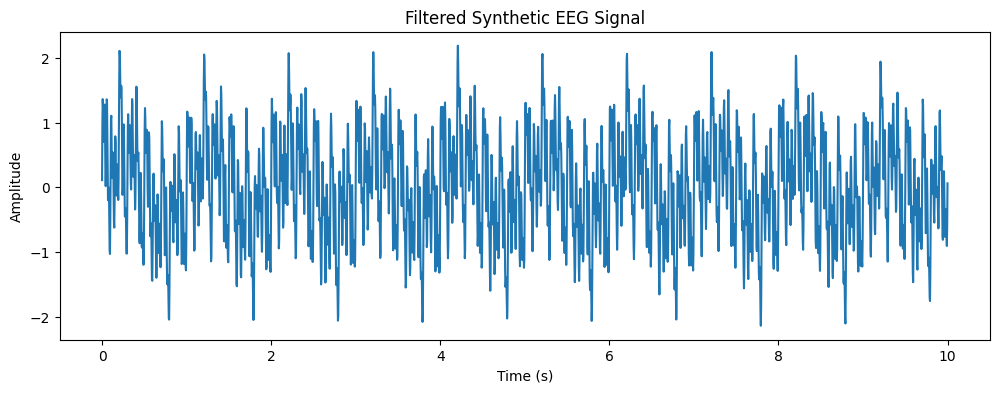

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Filter parameters
lowcut = 0.5
highcut = 50.0

filtered_eeg = bandpass_filter(disordered_eeg_signal, lowcut, highcut, fs)

# Plot filtered EEG
plt.figure(figsize=(12, 4))
plt.plot(t, filtered_eeg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Synthetic EEG Signal')
plt.show()


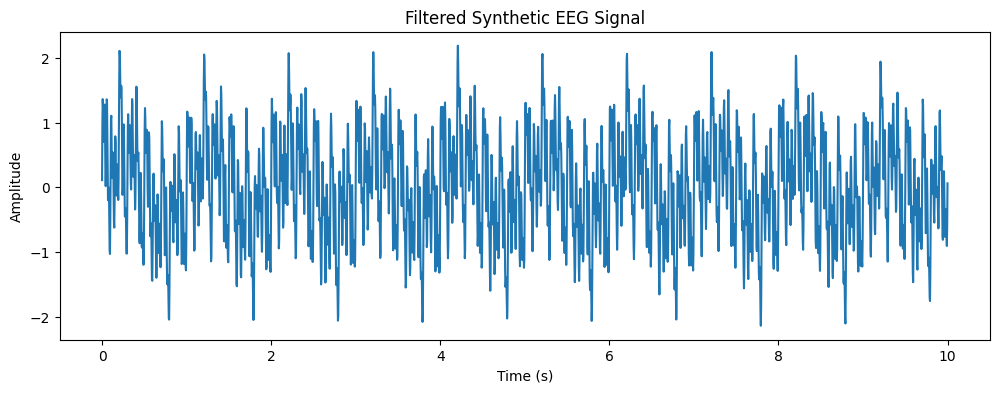

In [ ]:
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Filter parameters
lowcut = 0.5
highcut = 50.0

filtered_eeg = bandpass_filter(disordered_eeg_signal, lowcut, highcut, fs)

# Plot filtered EEG
plt.figure(figsize=(12, 4))
plt.plot(t, filtered_eeg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Synthetic EEG Signal')
plt.show()


In [ ]:
epoch_length = int(fs * 1)  # 1-second epochs
epochs = [filtered_eeg[i:i + epoch_length] for i in range(0, len(filtered_eeg), epoch_length)]


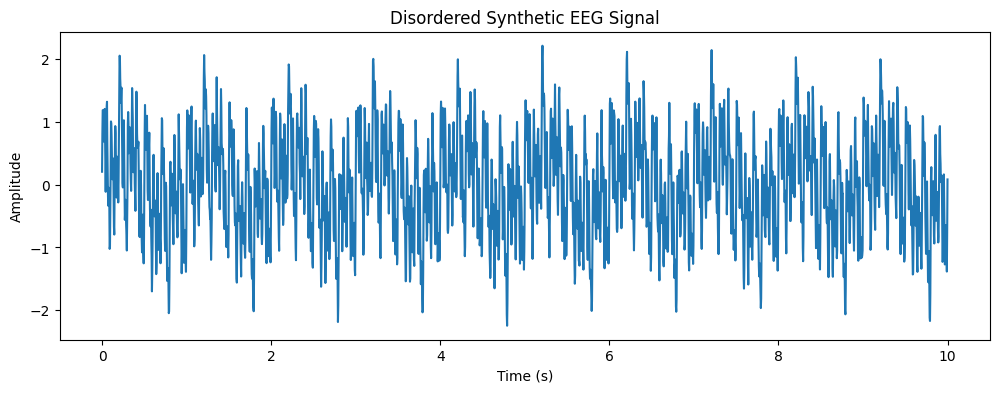

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import mne

# Generate time vector
duration = 10  # 10 seconds
fs = 256  # Sampling rate
t = np.linspace(0, duration, duration * fs)

# Generate synthetic EEG signals
delta = 0.5 * np.sin(2 * np.pi * 1 * t)  # Delta wave
theta = 0.5 * np.sin(2 * np.pi * 6 * t)  # Theta wave
alpha = 0.5 * np.sin(2 * np.pi * 10 * t)  # Alpha wave
beta = 0.5 * np.sin(2 * np.pi * 20 * t)  # Beta wave
gamma = 0.5 * np.sin(2 * np.pi * 40 * t)  # Gamma wave

# Combine to create synthetic EEG
eeg_signal = delta + theta + alpha + beta + gamma

# Add noise to simulate disordered EEG
noise = np.random.normal(0, 0.1, eeg_signal.shape)
disordered_eeg_signal = eeg_signal + noise

# Plot the synthetic EEG signal
plt.figure(figsize=(12, 4))
plt.plot(t, disordered_eeg_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Disordered Synthetic EEG Signal')
plt.show()


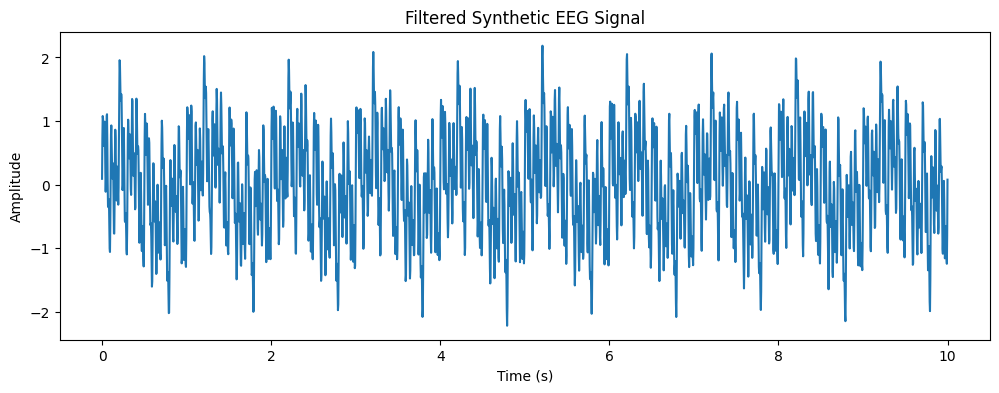

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Filter parameters
lowcut = 0.5
highcut = 50.0

filtered_eeg = bandpass_filter(disordered_eeg_signal, lowcut, highcut, fs)

# Plot filtered EEG
plt.figure(figsize=(12, 4))
plt.plot(t, filtered_eeg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Synthetic EEG Signal')
plt.show()


In [ ]:
!pip install gtts pydub librosa matplotlib ffmpeg


  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=b0a79e605fdc10ae8de4ed517a78e0b3e00fa688762ef5dc3e3be3356d3c2eb7
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


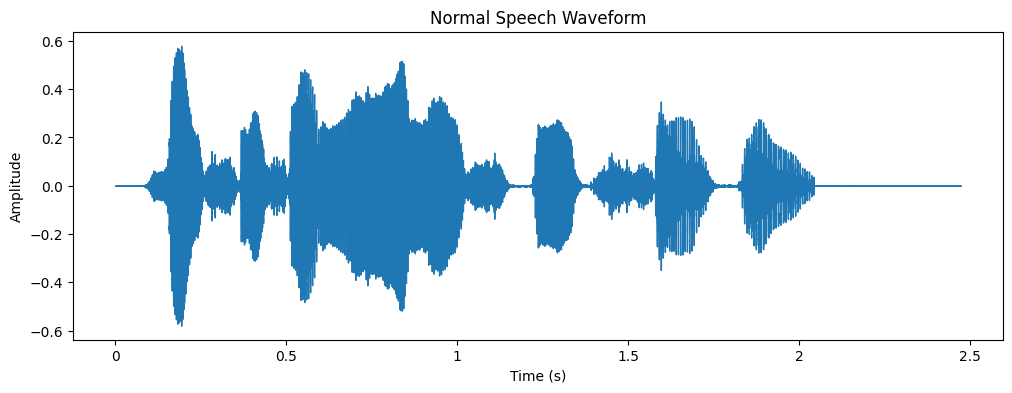

In [ ]:
from gtts import gTTS
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import librosa
import librosa.display
import os

# Generate synthetic speech using gTTS
text = "This is a normal speech sample."
tts = gTTS(text=text, lang='en')
tts.save("normal_speech.mp3")

# Convert mp3 to wav
audio = AudioSegment.from_mp3("normal_speech.mp3")
audio.export("normal_speech.wav", format="wav")

# Load the normal speech sample using librosa
speech, sr = librosa.load('normal_speech.wav', sr=None)

# Plot the normal speech waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(speech, sr=sr)
plt.title('Normal Speech Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


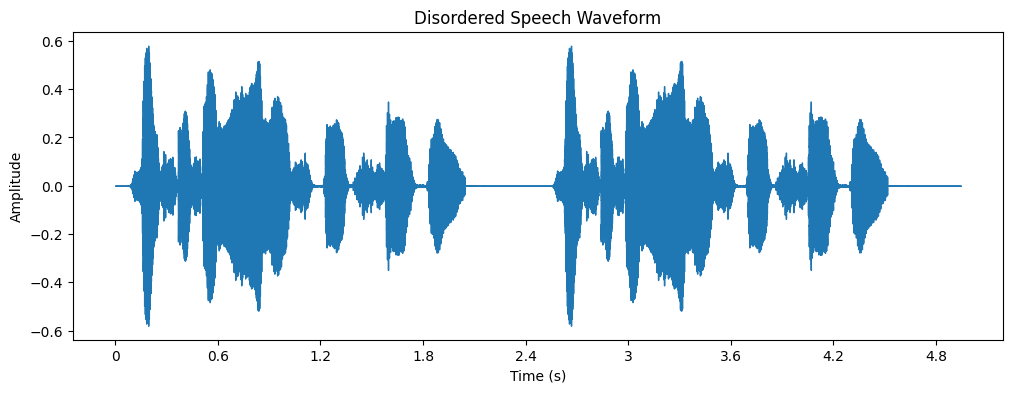

In [ ]:
# Load the speech sample using pydub
speech_segment = AudioSegment.from_wav('normal_speech.wav')

# Apply repetition effect to simulate a stuttering effect
repeated_speech = speech_segment + speech_segment

# Save the disordered speech sample
repeated_speech.export('disordered_speech.wav', format='wav')

# Load and plot the disordered speech using librosa
disordered_speech, sr = librosa.load('disordered_speech.wav', sr=None)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(disordered_speech, sr=sr)
plt.title('Disordered Speech Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


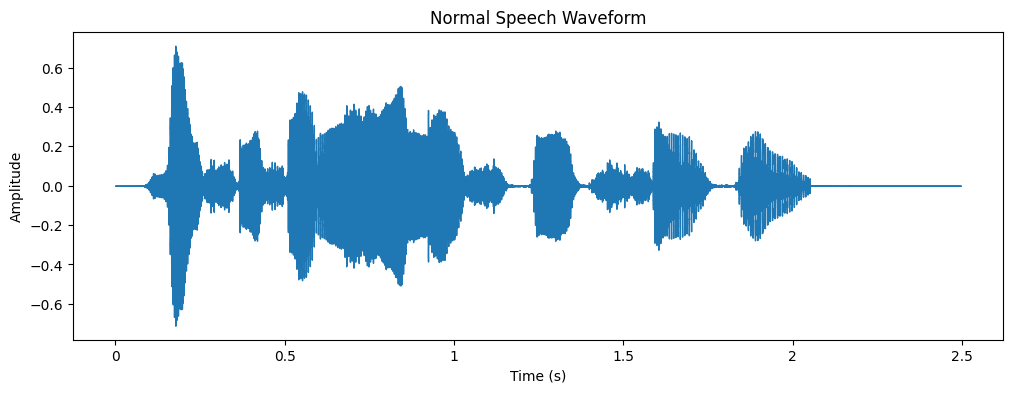

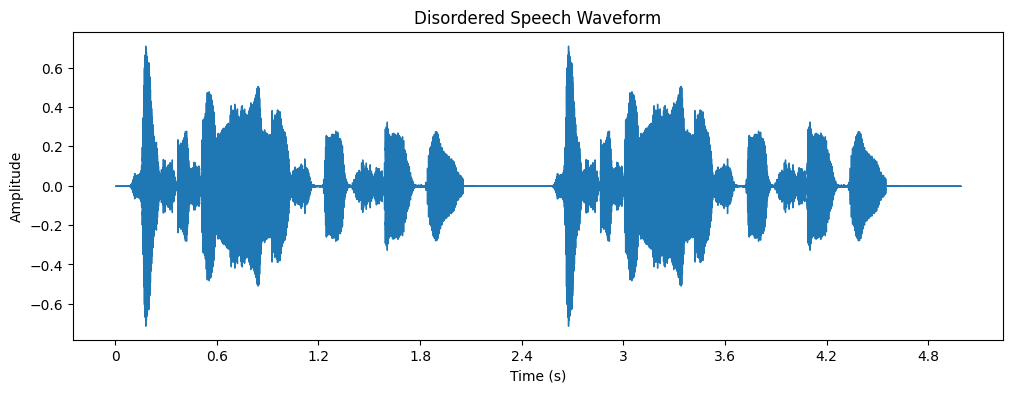

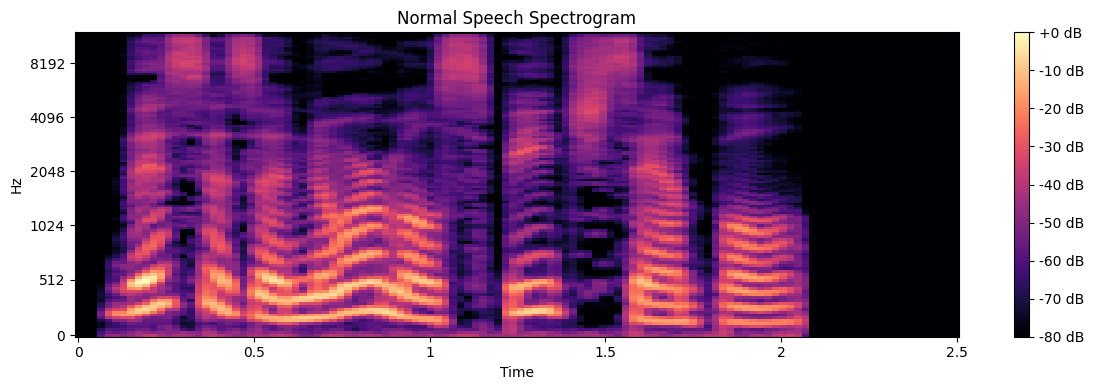

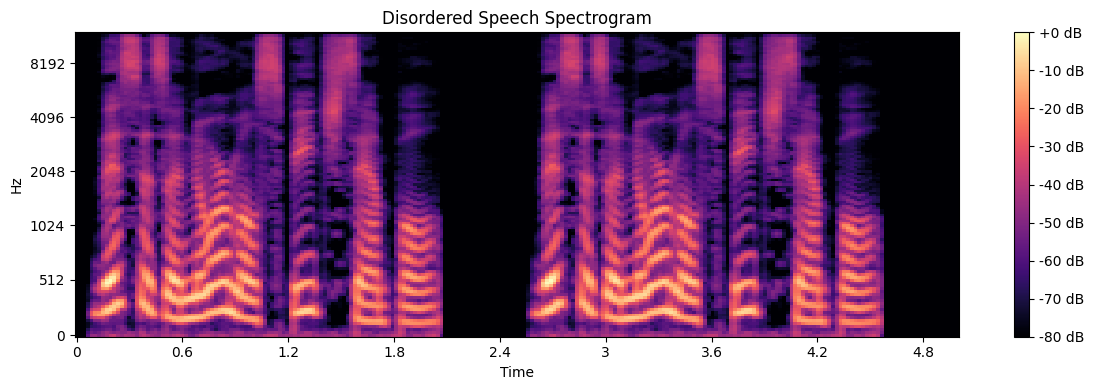

In [ ]:
!pip install gtts pydub librosa matplotlib ffmpeg

from gtts import gTTS
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import librosa
import librosa.display
import os

# Generate synthetic speech using gTTS
text = "This is a normal speech sample."
tts = gTTS(text=text, lang='en')
tts.save("normal_speech.mp3")

# Convert mp3 to wav
audio = AudioSegment.from_mp3("normal_speech.mp3")
audio.export("normal_speech.wav", format="wav")

# Load the normal speech sample using librosa
speech, sr = librosa.load('normal_speech.wav', sr=None)

# Plot the normal speech waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(speech, sr=sr)
plt.title('Normal Speech Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Load the speech sample using pydub
speech_segment = AudioSegment.from_wav('normal_speech.wav')

# Apply repetition effect to simulate a stuttering effect
repeated_speech = speech_segment + speech_segment

# Save the disordered speech sample
repeated_speech.export('disordered_speech.wav', format='wav')

# Load and plot the disordered speech using librosa
disordered_speech, sr = librosa.load('disordered_speech.wav', sr=None)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(disordered_speech, sr=sr)
plt.title('Disordered Speech Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

def plot_spectrogram(y, sr, title):
    plt.figure(figsize=(12, 4))
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot spectrogram for normal speech
plot_spectrogram(speech, sr, 'Normal Speech Spectrogram')

# Plot spectrogram for disordered speech
plot_spectrogram(disordered_speech, sr, 'Disordered Speech Spectrogram')


#24 monday


In [ ]:
!pip install gtts pydub librosa matplotlib mne numpy

from gtts import gTTS
from pydub import AudioSegment
import numpy as np
import os
import random
import mne

# Function to generate synthetic speech using gTTS
def generate_speech(text, filename):
    tts = gTTS(text=text, lang='en')
    tts.save(filename + ".mp3")
    audio = AudioSegment.from_mp3(filename + ".mp3")
    audio.export(filename + ".wav", format="wav")

# Function to apply effects to simulate speech disorders
def apply_effects(filename, effect):
    audio = AudioSegment.from_wav(filename + ".wav")
    if effect == "repeat":
        new_audio = audio + audio
    elif effect == "speed_up":
        new_audio = audio.speedup(playback_speed=1.5)
    elif effect == "slow_down":
        new_audio = audio.speedup(playback_speed=0.7)
    elif effect == "pitch_shift":
        new_audio = audio._spawn(audio.raw_data, overrides={
            "frame_rate": int(audio.frame_rate * 0.7)
        }).set_frame_rate(audio.frame_rate)
    else:
        new_audio = audio

    new_audio.export(filename + "_" + effect + ".wav", format="wav")
    os.remove(filename + ".mp3")
    os.remove(filename + ".wav")

# Function to generate and save the audio dataset
def generate_audio_dataset(dataset_dir, num_samples, size_limit_mb):
    os.makedirs(dataset_dir, exist_ok=True)
    phrases = [
        "This is a normal speech sample.",
        "Speech synthesis can generate various audio samples.",
        "Creating synthetic data is useful for training models.",
        "This example shows how to simulate speech disorders.",
        "Each sample will have different effects applied."
    ]
    effects = ["repeat", "speed_up", "slow_down", "pitch_shift"]

    for i in range(num_samples):
        text = random.choice(phrases)
        filename = os.path.join(dataset_dir, f"sample_{i}")
        generate_speech(text, filename)
        effect = random.choice(effects)
        apply_effects(filename, effect)
        print(f"Generated {filename}_{effect}.wav")

        if get_directory_size(dataset_dir) >= size_limit_mb * 1024**2:
            break

# Function to compute the directory size
def get_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size

# Function to generate synthetic EEG data
def generate_eeg_data(duration_sec, sfreq):
    n_samples = duration_sec * sfreq
    time = np.arange(n_samples) / sfreq
    data = np.random.randn(1, n_samples) * 10  # Simulate EEG signal with random noise
    info = mne.create_info(ch_names=['EEG'], sfreq=sfreq, ch_types=['eeg'])
    raw = mne.io.RawArray(data, info)
    return raw

# Function to save EEG data
def save_eeg_data(raw, filename):
    raw.save(filename, overwrite=True)

# Function to generate and save the EEG dataset
def generate_eeg_dataset(dataset_dir, num_samples, size_limit_mb, duration_sec=10, sfreq=256):
    os.makedirs(dataset_dir, exist_ok=True)
    for i in range(num_samples):
        raw = generate_eeg_data(duration_sec, sfreq)
        filename = os.path.join(dataset_dir, f"eeg_sample_{i}-raw.fif")
        save_eeg_data(raw, filename)
        print(f"Generated {filename}")

        if get_directory_size(dataset_dir) >= size_limit_mb * 1024**2:
            break

# Generate and save the audio dataset (e.g., limit to 50 MB)
audio_dataset_dir = "/content/audio_dataset"
generate_audio_dataset(audio_dataset_dir, 1000, 50)  # Change size limit as needed

# Generate and save the EEG dataset (e.g., limit to 50 MB)
eeg_dataset_dir = "/content/eeg_dataset"
generate_eeg_dataset(eeg_dataset_dir, 1000, 50)  # Change size limit as needed

# Verify dataset sizes
audio_dataset_size = get_directory_size(audio_dataset_dir) / (1024**2)
eeg_dataset_size = get_directory_size(eeg_dataset_dir) / (1024**2)

print(f"Audio Dataset Size: {audio_dataset_size:.2f} MB")
print(f"EEG Dataset Size: {eeg_dataset_size:.2f} MB")


Streaming output truncated to the last 5000 lines.
Creating RawArray with float64 data, n_channels=1, n_times=2560
    Range : 0 ... 2559 =      0.000 ...     9.996 secs
Ready.
Writing /content/eeg_dataset/eeg_sample_286-raw.fif
Closing /content/eeg_dataset/eeg_sample_286-raw.fif
[done]
Generated /content/eeg_dataset/eeg_sample_286-raw.fif
Creating RawArray with float64 data, n_channels=1, n_times=2560
    Range : 0 ... 2559 =      0.000 ...     9.996 secs
Ready.
Writing /content/eeg_dataset/eeg_sample_287-raw.fif
Closing /content/eeg_dataset/eeg_sample_287-raw.fif
[done]
Generated /content/eeg_dataset/eeg_sample_287-raw.fif
Creating RawArray with float64 data, n_channels=1, n_times=2560
    Range : 0 ... 2559 =      0.000 ...     9.996 secs
Ready.
Writing /content/eeg_dataset/eeg_sample_288-raw.fif
Closing /content/eeg_dataset/eeg_sample_288-raw.fif
[done]
Generated /content/eeg_dataset/eeg_sample_288-raw.fif
Creating RawArray with float64 data, n_channels=1, n_times=2560
    Range : 

In [ ]:
from gtts import gTTS
from pydub import AudioSegment
import numpy as np
import os
import random
import mne

# Function to generate synthetic speech using gTTS
def generate_speech(text, filename):
    tts = gTTS(text=text, lang='en')
    tts.save(filename + ".mp3")
    audio = AudioSegment.from_mp3(filename + ".mp3")
    audio.export(filename + ".wav", format="wav")

# Function to apply effects to simulate speech disorders
def apply_effects(filename, effect):
    audio = AudioSegment.from_wav(filename + ".wav")
    if effect == "repeat":
        new_audio = audio + audio
    elif effect == "speed_up":
        new_audio = audio.speedup(playback_speed=1.5)
    elif effect == "slow_down":
        new_audio = audio.speedup(playback_speed=0.7)
    elif effect == "pitch_shift":
        new_audio = audio._spawn(audio.raw_data, overrides={
            "frame_rate": int(audio.frame_rate * 0.7)
        }).set_frame_rate(audio.frame_rate)
    else:
        new_audio = audio

    new_audio.export(filename + "_" + effect + ".wav", format="wav")
    os.remove(filename + ".mp3")
    os.remove(filename + ".wav")

# Function to generate and save the audio dataset
def generate_audio_dataset(dataset_dir, num_samples, size_limit_mb):
    os.makedirs(dataset_dir, exist_ok=True)
    phrases = [
        "This is a normal speech sample.",
        "Speech synthesis can generate various audio samples.",
        "Creating synthetic data is useful for training models.",
        "This example shows how to simulate speech disorders.",
        "Each sample will have different effects applied."
    ]
    effects = ["repeat", "speed_up", "slow_down", "pitch_shift"]

    for i in range(num_samples):
        text = random.choice(phrases)
        filename = os.path.join(dataset_dir, f"sample_{i}")
        generate_speech(text, filename)
        effect = random.choice(effects)
        apply_effects(filename, effect)
        print(f"Generated {filename}_{effect}.wav")

        if get_directory_size(dataset_dir) >= size_limit_mb * 1024**2:
            break

# Function to compute the directory size
def get_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size

# Function to generate synthetic EEG data
def generate_eeg_data(duration_sec, sfreq):
    n_samples = duration_sec * sfreq
    time = np.arange(n_samples) / sfreq
    data = np.random.randn(1, n_samples) * 10  # Simulate EEG signal with random noise
    info = mne.create_info(ch_names=['EEG'], sfreq=sfreq, ch_types=['eeg'])
    raw = mne.io.RawArray(data, info)
    return raw

# Function to save EEG data
def save_eeg_data(raw, filename):
    raw.save(filename, overwrite=True)

# Function to generate and save the EEG dataset
def generate_eeg_dataset(dataset_dir, num_samples, size_limit_mb, duration_sec=10, sfreq=256):
    os.makedirs(dataset_dir, exist_ok=True)
    for i in range(num_samples):
        raw = generate_eeg_data(duration_sec, sfreq)
        filename = os.path.join(dataset_dir, f"eeg_sample_{i}-raw.fif")
        save_eeg_data(raw, filename)
        print(f"Generated {filename}")

        if get_directory_size(dataset_dir) >= size_limit_mb * 1024**2:
            break

# Generate and save the audio dataset (e.g., limit to 50 MB)
audio_dataset_dir = "audio_dataset"
generate_audio_dataset(audio_dataset_dir, 1000, 50)  # Change size limit as needed

# Generate and save the EEG dataset (e.g., limit to 50 MB)
eeg_dataset_dir = "eeg_dataset"
generate_eeg_dataset(eeg_dataset_dir, 1000, 50)  # Change size limit as needed

# Verify dataset sizes
audio_dataset_size = get_directory_size(audio_dataset_dir) / (1024**2)
eeg_dataset_size = get_directory_size(eeg_dataset_dir) / (1024**2)

print(f"Audio Dataset Size: {audio_dataset_size:.2f} MB")
print(f"EEG Dataset Size: {eeg_dataset_size:.2f} MB")


Streaming output truncated to the last 5000 lines.
Creating RawArray with float64 data, n_channels=1, n_times=2560
    Range : 0 ... 2559 =      0.000 ...     9.996 secs
Ready.
Writing /content/eeg_dataset/eeg_sample_286-raw.fif
Closing /content/eeg_dataset/eeg_sample_286-raw.fif
[done]
Generated eeg_dataset/eeg_sample_286-raw.fif
Creating RawArray with float64 data, n_channels=1, n_times=2560
    Range : 0 ... 2559 =      0.000 ...     9.996 secs
Ready.
Writing /content/eeg_dataset/eeg_sample_287-raw.fif
Closing /content/eeg_dataset/eeg_sample_287-raw.fif
[done]
Generated eeg_dataset/eeg_sample_287-raw.fif
Creating RawArray with float64 data, n_channels=1, n_times=2560
    Range : 0 ... 2559 =      0.000 ...     9.996 secs
Ready.
Writing /content/eeg_dataset/eeg_sample_288-raw.fif
Closing /content/eeg_dataset/eeg_sample_288-raw.fif
[done]
Generated eeg_dataset/eeg_sample_288-raw.fif
Creating RawArray with float64 data, n_channels=1, n_times=2560
    Range : 0 ... 2559 =      0.000 ...

In [ ]:
!pip install gtts pydub numpy mne
!apt-get install ffmpeg -y


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 64.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
